In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df= pd.read_excel('/content/Absenteeism_at_work_Project.xls')

# Data understanding

In [3]:
df.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,97.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,97.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [4]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14.0,7.0,3,1,289.0,36.0,13.0,33.0,264604.0,93.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,8.0
736,1,11.0,7.0,3,1,235.0,11.0,14.0,37.0,264604.0,93.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,4.0
737,4,0.0,0.0,3,1,118.0,14.0,13.0,40.0,271219.0,95.0,0.0,1.0,1.0,1.0,0.0,8.0,98.0,170.0,34.0,0.0
738,8,0.0,0.0,4,2,231.0,35.0,14.0,39.0,271219.0,95.0,0.0,1.0,2.0,1.0,0.0,2.0,100.0,170.0,35.0,0.0


In [5]:
max(df.ID.unique())

36

In [6]:
df.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               737 non-null    float64
 2   Month of absence                 739 non-null    float64
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           733 non-null    float64
 6   Distance from Residence to Work  737 non-null    float64
 7   Service time                     737 non-null    float64
 8   Age                              737 non-null    float64
 9   Work load Average/day            730 non-null    float64
 10  Hit target                       734 non-null    float64
 11  Disciplinary failure             734 non-null    float64
 12  Education             

In [8]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,734.000000,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,94.587193,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,3.792705,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [9]:
df.shape

(740, 21)

# EDA

In [10]:
# categorising the variables 
cont = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

cat = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

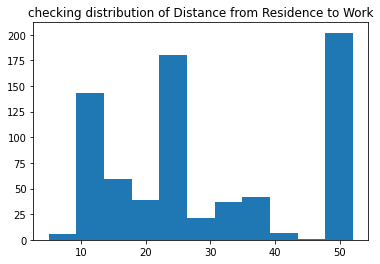

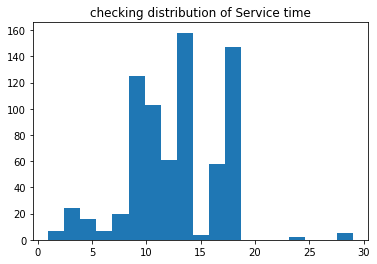

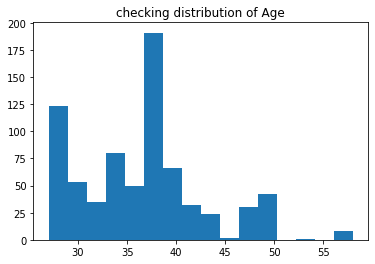

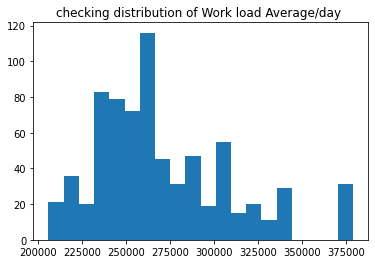

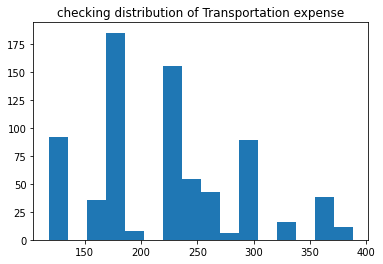

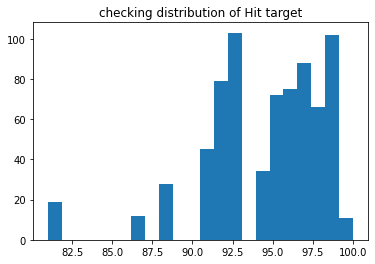

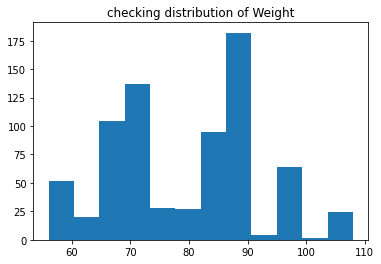

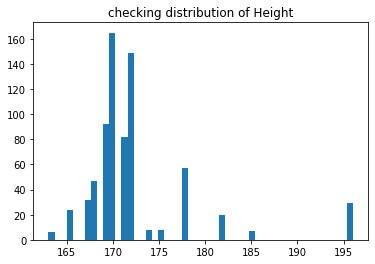

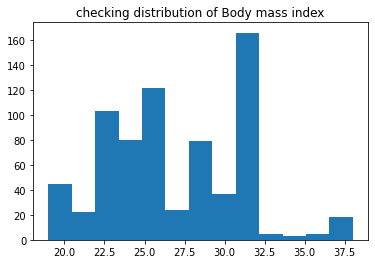

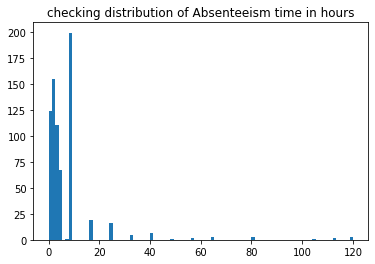

In [11]:
for i in cont :
    plt.hist(df[i].dropna(),bins='auto')
    plt.title('checking distribution of ' + str(i))
    plt.show()

In [12]:
#checking mean of Absenteeism time in hr
df['Absenteeism time in hours'].dropna().mean()

6.977715877437326

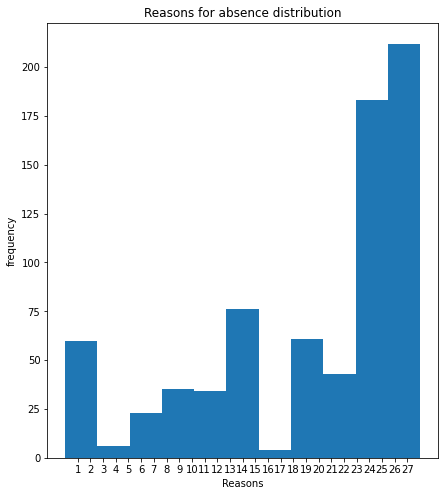

In [13]:
#checking reason for absenteeism
plt.figure(figsize=(7,8))
plt.hist(df['Reason for absence'].dropna(),bins='auto')
plt.xticks(range(1,28))
plt.xlabel('Reasons')
plt.ylabel('frequency')
plt.title('Reasons for absence distribution')
plt.show()

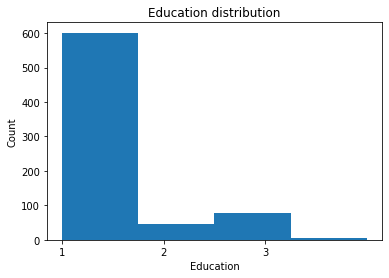

In [14]:
#checking education variable
plt.hist(df['Education'].dropna(),bins=4)
plt.xticks(range(1,4))
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education distribution')
plt.show()

It is seen people with a lower education metrics tend to absent longer(1>>3)

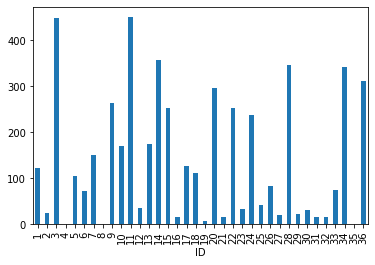

In [15]:
#grouping the data using ID and plotting bar plot
df.groupby('ID').sum()['Absenteeism time in hours'].plot.bar()

Seen that ID 3 and 11 are having most amount of absent hours

Text(0, 0.5, 'Count')

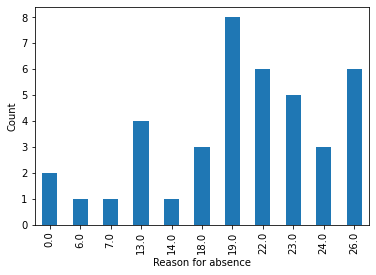

In [16]:
#checking what are reasons for absence of highest absentee (ID=11)
df.iloc[np.where(df['ID']==11)].groupby('Reason for absence').count()['ID'].plot.bar()
plt.ylabel('Count')

The guy got with a number of absent reasons which is suspicious of which reason 19 was observed the most

Text(0, 0.5, 'Count')

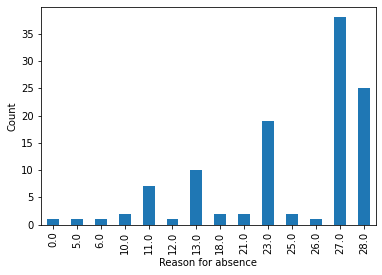

In [17]:
df.iloc[np.where(df['ID']==3)].groupby('Reason for absence').count()['ID'].plot.bar()
plt.ylabel('Count')

Text(0, 0.5, 'Absenteeism in hours')

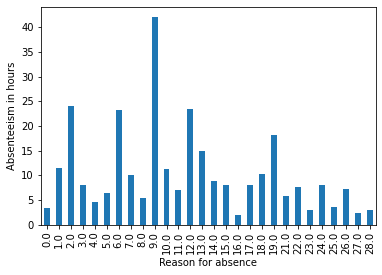

In [18]:
#group data using reason for absence and plotting
df.groupby('Reason for absence').mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism in hours')

Text(0, 0.5, 'Absenteeism in hours')

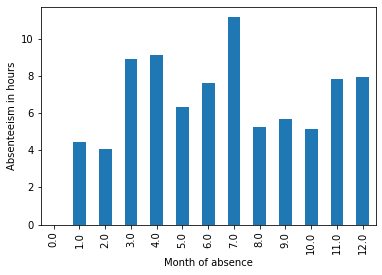

In [19]:
df.groupby(['Month of absence']).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism in hours')

Text(0, 0.5, 'Absenteeism in hours')

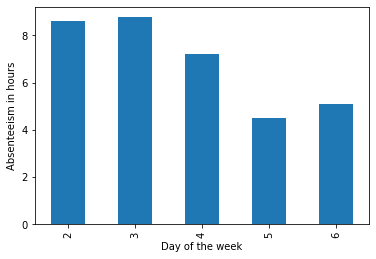

In [20]:
df.groupby(['Day of the week']).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism in hours')

Text(0, 0.5, 'Absenteeism in hours')

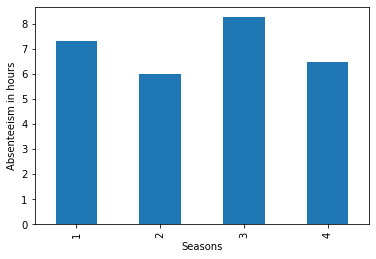

In [21]:
df.groupby(['Seasons']).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism in hours')

PLOTTING CATEGORICAL VARIABLES WITH NO. OF HRS OF ABSENT

Text(0, 0.5, 'Absenteeism in hours')

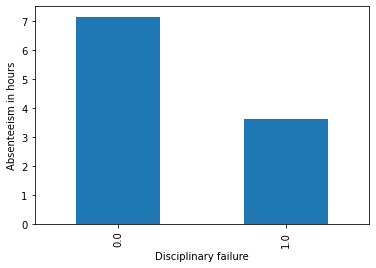

In [22]:
df.groupby([cat[5]]).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism in hours')

Text(0, 0.5, 'Absenteeism in hours')

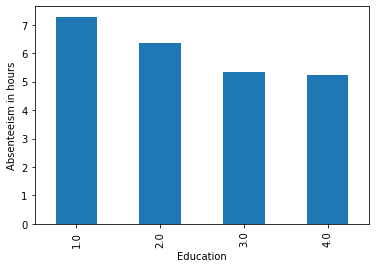

In [23]:
df.groupby([cat[6]]).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism in hours')

Text(0, 0.5, 'Absenteeism in hours')

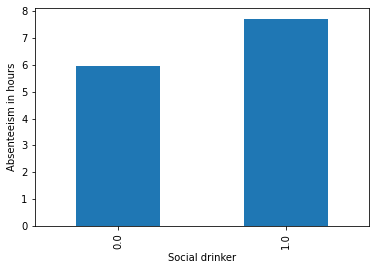

In [24]:
df.groupby([cat[7]]).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism in hours')

Text(0, 0.5, 'Absenteeism in hours')

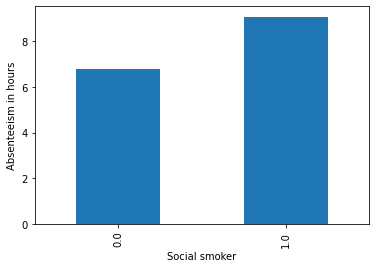

In [25]:
df.groupby([cat[8]]).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism in hours')

Text(0, 0.5, 'Absenteeism in hours')

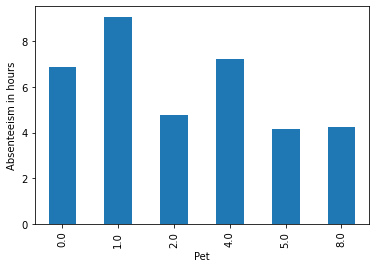

In [26]:
df.groupby([cat[9]]).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism in hours')

Text(0, 0.5, 'Absenteeism in hours')

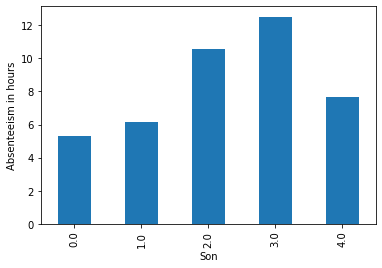

In [27]:
df.groupby([cat[10]]).mean()['Absenteeism time in hours'].plot.bar()
plt.ylabel('Absenteeism in hours')

# Missing Value Imputation and Outlier Analysis

In [28]:
#looking for mISSING values
#Creating dataframe with missing values present in each variable
missing = df.isnull().sum()/len(df)*100
missing

ID                                 0.000000
Reason for absence                 0.405405
Month of absence                   0.135135
Day of the week                    0.000000
Seasons                            0.000000
Transportation expense             0.945946
Distance from Residence to Work    0.405405
Service time                       0.405405
Age                                0.405405
Work load Average/day              1.351351
Hit target                         0.810811
Disciplinary failure               0.810811
Education                          1.351351
Son                                0.810811
Social drinker                     0.405405
Social smoker                      0.540541
Pet                                0.270270
Weight                             0.135135
Height                             1.891892
Body mass index                    4.189189
Absenteeism time in hours          2.972973
dtype: float64

In [29]:
# Droping observation in which "Absenteeism time in hours" has missing value
df = df.drop(df[df['Absenteeism time in hours'].isnull()].index, axis=0)
print(df.shape)
print(df['Absenteeism time in hours'].isnull().sum())

(718, 21)
0


In [30]:
df['Body mass index'].iloc[12]

31.0

In [31]:
# create missing value
df['Body mass index'].iloc[12] = np.nan

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [32]:
from fancyimpute import KNN
#Apply KNN imputation algorithm
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Imputing row 1/718 with 0 missing, elapsed time: 0.109
Imputing row 101/718 with 1 missing, elapsed time: 0.111
Imputing row 201/718 with 0 missing, elapsed time: 0.113
Imputing row 301/718 with 0 missing, elapsed time: 0.114
Imputing row 401/718 with 0 missing, elapsed time: 0.115
Imputing row 501/718 with 1 missing, elapsed time: 0.116
Imputing row 601/718 with 0 missing, elapsed time: 0.117
Imputing row 701/718 with 0 missing, elapsed time: 0.117


In [33]:
df['Body mass index'].iloc[12]

30.999998833986012

In [34]:
# Checking if all the missing value imputed
df.isnull().sum().sum()

0

Text(0, 0.5, 'Values')

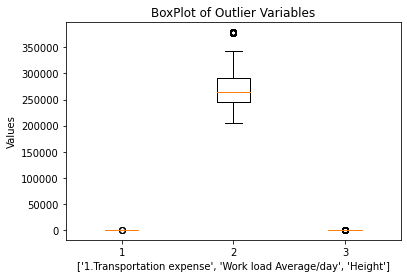

In [35]:
# Ploting BoxPlot of continuous variables
plt.boxplot([df['Transportation expense'],df['Work load Average/day '],df['Height']])
plt.xlabel(['1.Transportation expense','Work load Average/day','Height' ])
plt.title("BoxPlot of Outlier Variables")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

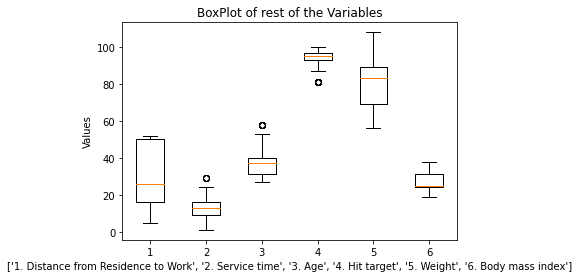

In [37]:
plt.boxplot([ df['Distance from Residence to Work'], df['Service time'], df['Age'], df['Hit target'], df['Weight'], df['Body mass index']])
plt.xlabel(['1. Distance from Residence to Work', '2. Service time', '3. Age', '4. Hit target', '5. Weight', '6. Body mass index'])
plt.title("BoxPlot of rest of the Variables")
plt.ylabel('Values')

In [38]:
# list of variables which doesn't have outlier
neglect = ['Distance from Residence to Work', 'Weight', 'Body mass index']

# Looping over all continuou variables to detect and remove Outliers
for i in cont:
    # Avoiding the variables which doesn't have outlier
    if i in neglect:
        continue
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(df[i], [75,25])
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Replacing all the outliers value to NA
    df.loc[df[i]< minimum,i] = np.nan
    df.loc[df[i]> maximum,i] = np.nan


# Imputing missing values with KNN
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)
# Checking if there is any missing value
df.isnull().sum().sum()

Imputing row 1/718 with 0 missing, elapsed time: 0.113
Imputing row 101/718 with 0 missing, elapsed time: 0.115
Imputing row 201/718 with 1 missing, elapsed time: 0.116
Imputing row 301/718 with 0 missing, elapsed time: 0.118
Imputing row 401/718 with 0 missing, elapsed time: 0.121
Imputing row 501/718 with 0 missing, elapsed time: 0.122
Imputing row 601/718 with 2 missing, elapsed time: 0.124
Imputing row 701/718 with 0 missing, elapsed time: 0.126


0

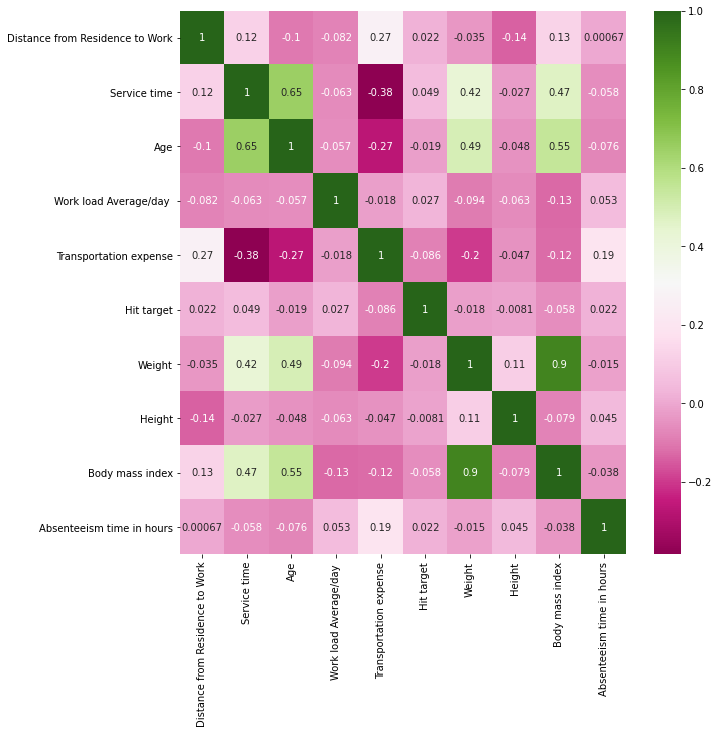

In [39]:
#Correlation plot
df_corr = df.loc[:,cont]
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_corr.corr(), annot= True ,cmap= 'PiYG')

only weight and BMi and service time and age has some correlation. Now we normalise the data

In [40]:
# #Normalization for feature scaling
for i in cont:
    if i == 'Absenteeism time in hours':
        continue
    df[i] = (df[i] - df[i].min())/(df[i].max()-df[i].min())

In [41]:
# Get dummy variables for categorical variables
df = pd.get_dummies(data = df, columns = cat , drop_first= True)

# Copying dataframe
df1 = df.copy()

In [42]:
df

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Body mass index,Absenteeism time in hours,ID_2.0,ID_3.0,ID_4.0,ID_5.0,ID_6.0,ID_7.0,ID_8.0,ID_9.0,ID_10.0,ID_11.0,ID_12.0,ID_13.0,ID_14.0,ID_15.0,ID_16.0,ID_17.0,ID_18.0,ID_19.0,ID_20.0,ID_21.0,ID_22.0,ID_23.0,ID_24.0,ID_25.0,ID_26.0,ID_27.0,ID_28.0,ID_29.0,ID_30.0,ID_31.0,...,Month of absence_6.0,Month of absence_7.0,Month of absence_8.0,Month of absence_9.0,Month of absence_10.0,Month of absence_10.00000040690432,Month of absence_11.0,Month of absence_12.0,Day of the week_3.0,Day of the week_4.0,Day of the week_5.0,Day of the week_6.0,Seasons_2.0,Seasons_3.0,Seasons_4.0,Disciplinary failure_1.0,Education_0.9999999910449356,Education_1.0,Education_1.0000000046716917,Education_1.0000000613102742,Education_2.0,Education_3.0,Education_4.0,Social drinker_0.7174555868462206,Social drinker_0.9318242985103623,Social drinker_1.0,Social smoker_1.0,Pet_1.0,Pet_1.0000000061366812,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0,Son_1.0,Son_1.0000000034808583,Son_2.0,Son_2.000000090044646,Son_3.0,Son_3.9575535615568516,Son_4.0
0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.653846,0.700000,0.578947,4.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.000000,0.170213,0.739130,0.884615,0.244925,0.769231,0.807692,0.500001,0.631579,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0.234615,0.978723,0.739130,0.423077,0.244925,0.769231,0.634615,0.500000,0.631579,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.619231,0.000000,0.565217,0.461538,0.244925,0.769231,0.230769,0.300000,0.263158,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.653846,0.700000,0.578947,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,0.657692,0.659574,0.521739,0.230769,0.427324,0.461538,0.653846,0.700000,0.578947,8.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
714,0.450000,0.127660,0.565217,0.384615,0.427324,0.461538,0.615385,0.700000,0.526316,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
715,0.000000,0.191489,0.521739,0.500000,0.475491,0.615385,0.807692,0.500000,0.789474,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
716,0.434615,0.638298,0.565217,0.461538,0.475491,0.615385,0.846154,0.500000,0.842105,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [43]:
df.shape

(718, 120)

In [44]:
df.shape

(718, 120)

# MODEL BUILDING

In [47]:
#seperating label colums as y
X = df.drop(['Absenteeism time in hours'], axis=1)
y= df['Absenteeism time in hours']

In [48]:
y

0      4.0
1      0.0
2      2.0
3      4.0
4      2.0
      ... 
713    8.0
714    4.0
715    0.0
716    0.0
717    0.0
Name: Absenteeism time in hours, Length: 718, dtype: float64

In [49]:
#train test split
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test= train_test_split(X,y,test_size = 0.20 , random_state= 500)

In [50]:
#Decision tree
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

# Building model on top of training dataset
fit_DT = DT(max_depth = 2).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_DT.predict(X_train)
rmse_for_train = np.sqrt(mse(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_DT.predict(X_test)
rmse_for_test =np.sqrt(mse(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2(y_test,pred_test)))

Root Mean Squared Error For Training data = 3.184194781667547
Root Mean Squared Error For Test data = 2.9708458371736275
R^2 Score(coefficient of determination) = 0.15456367164974316


In [51]:
#Random Forest 
from sklearn.ensemble import RandomForestRegressor as RF


# Building model on top of training dataset
fit_RF = RF(n_estimators = 500).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mse(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_DT.predict(X_test)
rmse_for_test =np.sqrt(mse(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2(y_test,pred_test)))

Root Mean Squared Error For Training data = 1.0952772132804778
Root Mean Squared Error For Test data = 2.9708458371736275
R^2 Score(coefficient of determination) = 0.15456367164974316


Due to high dimensionality of data due to One hot encoding the R2 square is coming very poor. So we will try to do a dimensionality reduction using PCA

# Dimensionality Reduction using PCA

In [52]:
df.shape

(718, 120)

In [53]:
X.shape

(718, 119)

In [54]:
target = df['Absenteeism time in hours']

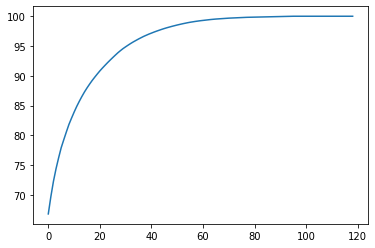

In [55]:
from sklearn.decomposition import PCA

# Converting data to numpy array
Xp = df1.values

# Data has 119 variables so no of components of PCA = 119
pca = PCA(n_components=119)
pca.fit(Xp)

# The amount of variance that each PC explains
var= pca.explained_variance_ratio_

# Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)
plt.show()

In [56]:
# From the above plot selecting 70 components since it explains almost 95+ % data variance
pca = PCA(n_components=70)

# Fitting the selected components to the data
pca.fit(X)

# Using train_test_split sampling function for test and train data split
X_train, X_test, y_train, y_test = train_test_split(Xp,target, test_size=0.2)

In [57]:
#Decision tree
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Building model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_DT.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_DT.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2(y_test,pred_test)))

Root Mean Squared Error For Training data = 0.5608320969357045
Root Mean Squared Error For Test data = 0.6168754874315688
R^2 Score(coefficient of determination) = 0.9663140659527257


In [58]:
#Random Forest 
from sklearn.ensemble import RandomForestRegressor as RF


# Building model on top of training dataset
fit_RF = RF(n_estimators = 500).fit(X_train,y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_RF.predict(X_train)
rmse_for_train = np.sqrt(mse(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_DT.predict(X_test)
rmse_for_test =np.sqrt(mse(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2(y_test,pred_test)))

Root Mean Squared Error For Training data = 0.02065780918110921
Root Mean Squared Error For Test data = 0.6168754874315688
R^2 Score(coefficient of determination) = 0.9663140659527257


In [59]:
# Importing library for Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# Building model on top of training dataset
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

# Calculating RMSE for training data to check for over fitting
pred_train = fit_GB.predict(X_train)
rmse_for_train = np.sqrt(mean_squared_error(y_train,pred_train))

# Calculating RMSE for test data to check accuracy
pred_test = fit_GB.predict(X_test)
rmse_for_test =np.sqrt(mean_squared_error(y_test,pred_test))

print("Root Mean Squared Error For Training data = "+str(rmse_for_train))
print("Root Mean Squared Error For Test data = "+str(rmse_for_test))
print("R^2 Score(coefficient of determination) = "+str(r2(y_test,pred_test)))

Root Mean Squared Error For Training data = 0.0014790045174777528
Root Mean Squared Error For Test data = 0.13557124197458148
R^2 Score(coefficient of determination) = 0.9983729956390953
